# Week 3 classwork - Reddit 

### import packages

In [3]:
!pip install praw


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Authentication

In [4]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="nmhIT5JxtgA7_X3ojjFc1Q",
    client_secret="ghdZk3vje_FiK4VZdr6PO29f0ivo-w",
    user_agent=user_agent
)

In [5]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## Get Trending Topic from your Subreddit

#### The **"bitcoin"** subreddit channel will be use for this project

In [7]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Bitcoin Newcomers FAQ - Please read!
16bm9de
BitcoinFan7
1694011779.0
199
0.94
https://www.reddit.com/r/Bitcoin/comments/16bm9de/bitcoin_newcomers_faq_please_read/
0


**Get total comment in Subreddit**

In [9]:
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

784


In [10]:
#Create a dataframe from the scrapped data 
bitcoin_df = pd.DataFrame(headlines)
bitcoin_df.head()

,0
0,All we care about is the price of BTC in fiat
1,coldcard
2,Beginner Bitcoin: How To Win The Crypto Game
3,UK Police Uncover $1.7 Billion in Bitcoin from...
4,Why is Bitcoin the superior currency ..short e...


In [11]:
bitcoin_df.columns

RangeIndex(start=0, stop=1, step=1)

In [12]:
bitcoin_df.columns = ['Titles']

In [13]:
bitcoin_df.head()

,Titles
0,All we care about is the price of BTC in fiat
1,coldcard
2,Beginner Bitcoin: How To Win The Crypto Game
3,UK Police Uncover $1.7 Billion in Bitcoin from...
4,Why is Bitcoin the superior currency ..short e...


In [14]:
bitcoin_df.Titles.duplicated().sum() 

0

In [15]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()

,Titles
0,All we care about is the price of BTC in fiat
1,coldcard
2,Beginner Bitcoin: How To Win The Crypto Game
3,UK Police Uncover $1.7 Billion in Bitcoin from...
4,Why is Bitcoin the superior currency ..short e...


In [16]:
!pip install textblob


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [40]:
from textblob import TextBlob  # Make sure to import TextBlob

# Create a function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Now we create new columns for subjectivity and polarity and add them to the bitcoin_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

# Now display the data
bitcoin_df.head()


,Titles,Subjectivity,Polarity
0,All we care about is the price of BTC in fiat,0.0,0.0
1,coldcard,0.0,0.0
2,Beginner Bitcoin: How To Win The Crypto Game,0.4,0.2
3,UK Police Uncover $1.7 Billion in Bitcoin from...,0.0,0.0
4,Why is Bitcoin the superior currency ..short e...,0.9,0.7


In [20]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,WHAT IS THE BEST WALLET TO HOLD?,0.300000,1.000000,Positive
1,Awesome article on Bitcoin mining in Africa,1.000000,1.000000,Positive
2,Brief reminder,0.333333,0.000000,Neutral
3,Stuck Transaction,0.000000,0.000000,Neutral
4,NEW Bitcoin Film,0.454545,0.136364,Positive
5,"JPMorgan CEO Jamie Dimon: ""I defend your right...",0.535714,0.285714,Positive
6,Zero-knowledge proofs on the Bitcoin testnet!,0.000000,0.000000,Neutral
7,Gifting a house in exchange for BTC,0.000000,0.000000,Neutral
8,I hold btc (for now) but this is why i'm not 1...,0.000000,0.000000,Neutral
9,Blockchain shows individual address amounts or...,0.400000,0.000000,Neutral


In [45]:
print(bitcoin_df.columns)

Index(['Titles', 'Subjectivity', 'Polarity'], dtype='object')


# Data Visualization

In [31]:
!pip install seaborn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [57]:
print(bitcoin_df.columns)

Index(['Titles', 'Subjectivity', 'Polarity'], dtype='object')


KeyError: 'Insight'

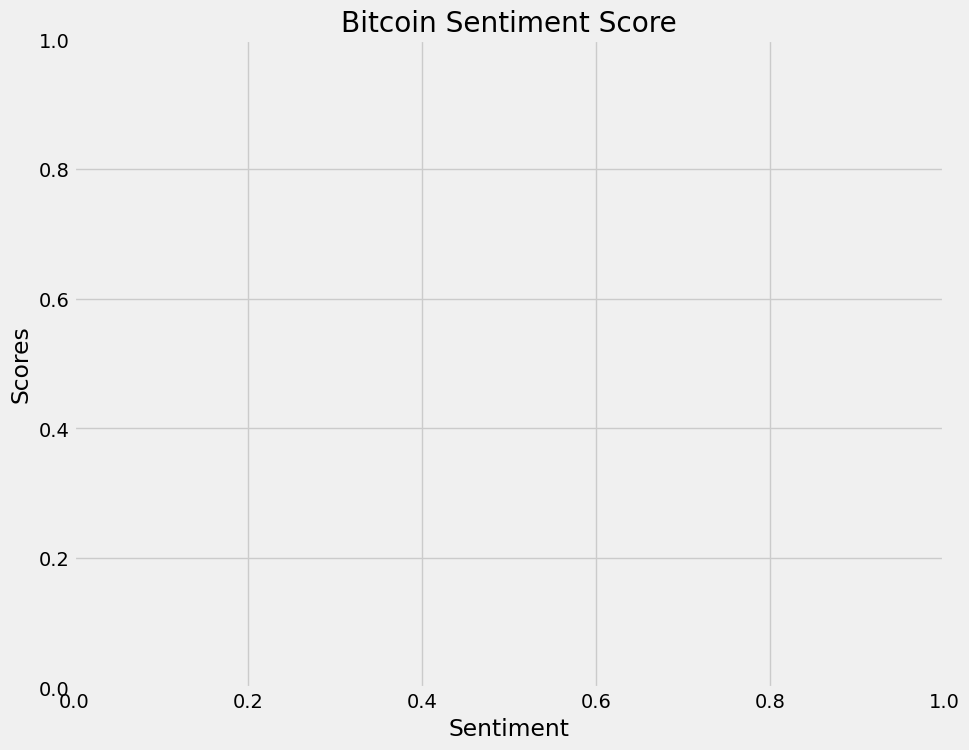

In [58]:
#Plot the values count of sentiment
plt.title("Bitcoin Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

KeyError: 'Insight'

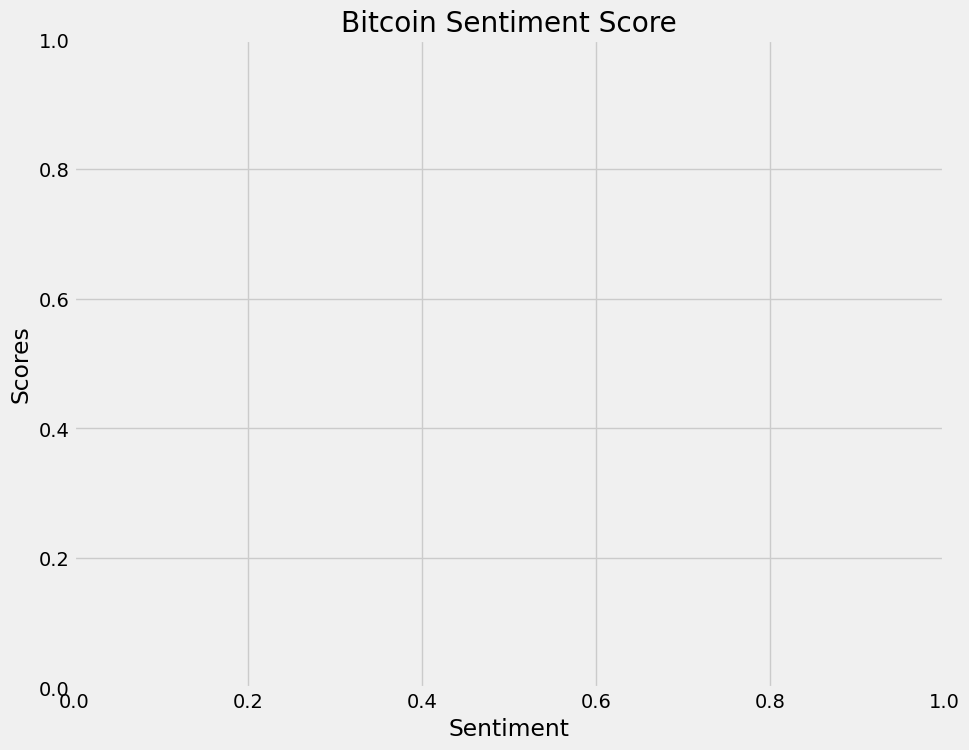

In [48]:
#Plot the values count of sentiment
plt.title("Bitcoin Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Wordcloud

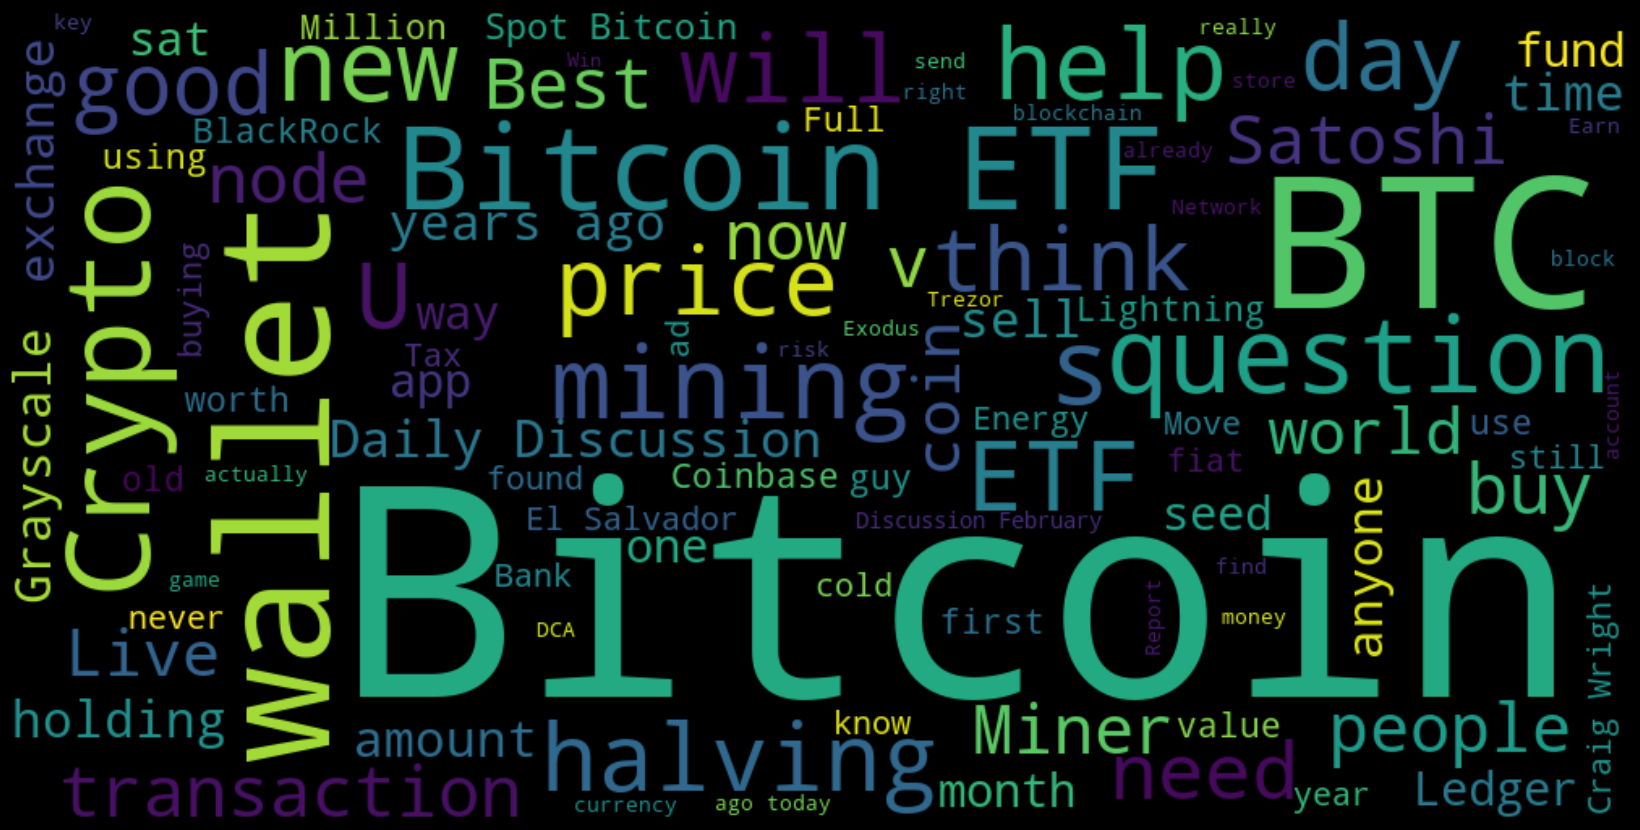

In [38]:
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 500,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");